Energy value: (-200+0.1j) G:  (0.0246332953800344+0.002095705698830254j)
Energy value: (-195.95959595959596+0.1j) G:  (-0.026843546107019337+0.009863207096901926j)
Energy value: (-191.91919191919192+0.1j) G:  (-0.01738379798457977-0.008677649916206098j)
Energy value: (-187.87878787878788+0.1j) G:  (-0.016115822548212227-0.014591417942838079j)
Energy value: (-183.83838383838383+0.1j) G:  (-0.009958726561852956-0.019638925910227627j)
Energy value: (-179.7979797979798+0.1j) G:  (-0.007867061737098634-0.016083742838395223j)
Energy value: (-175.75757575757575+0.1j) G:  (0.007835402253542805-0.0166726096635397j)
Energy value: (-171.7171717171717+0.1j) G:  (0.003530342514021863-0.0057908178578250265j)
Energy value: (-167.67676767676767+0.1j) G:  (0.0038847996025141557-0.006504035814595792j)
Energy value: (-163.63636363636363+0.1j) G:  (0.0091908333283904-0.003226437641241417j)
Energy value: (-159.59595959595958+0.1j) G:  (0.005916013454453495-0.0011819845024742556j)
Energy value: (-155.555555

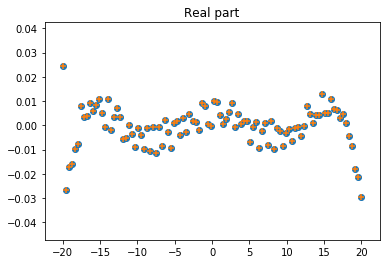

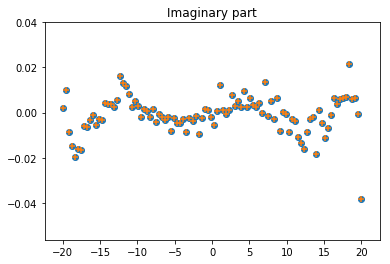

In [9]:
import numpy as np
e_n = 1 # energy
t_n = 100 # amplitude for hopping (|r| = 1)
%matplotlib inline

N = 1000 # number of particle sites
x_axis, y_axis = (507, 500)
G__values = []

H = np.zeros((N, N), dtype = complex)
for n in range(N):
    H[n, n] = e_n
    if n - 1 >= 0:
        H[n, n-1] = t_n
    if n + 1 < N:
        H[n, n+1] = t_n
w, v = np.linalg.eig(H)

boundary_conditions = {}
for x in np.linspace(-200, 200, 100):
    z = x +0.1j # energy value
    

    G_ = np.zeros((N, N), dtype = complex)
#     for n in range(N):
#         for n_ in range(N):
    G_[x_axis, y_axis] = np.sum(v[x_axis] * v[y_axis] / (z - w))
    boundary_conditions[z] = [np.sum(v[0] * v[y_axis] / (z - w)),
                             np.sum(v[-1] * v[y_axis] / (z - w))]

    G__values.append(G_[x_axis, y_axis])
    print("Energy value:", z, "G: ", G_[x_axis, y_axis])

G_values = []
for x in np.linspace(-200, 200, 100):
    z = x + 0.1j # energy value

    G = np.zeros((N, N), dtype = complex)
    alpha = beta = t_n / (z - e_n) 

    A = np.zeros(N, dtype = complex)
    K = np.zeros(N, dtype = complex)
    A[1] = beta
    K[1] = alpha * boundary_conditions[z][0]
    A[N - 2] = alpha
    K[N - 2] = beta * boundary_conditions[z][1]

    for n in [y_axis]:
        if (n == 0) or (n == (N - 1)):
            continue
            
        n_ = 2
        V = G[n]
        while n_ < n: # going forwards
            A[n_] = beta / (1 - alpha * A[n_ - 1])
            K[n_] = alpha * K[n_ - 1] / (1 - alpha * A[n_ - 1])
#             print (n_, K[n_])
            n_ += 1
            
        n_ = N - 3
        while n_ > n: # going backwards
            A[n_] = alpha / (1 - beta * A[n_ + 1])
            K[n_] = beta * K[n_ + 1] / (1 - beta * A[n_ + 1])
            n_ -= 1

        # Calculating Green's function
        V[n] = (alpha * K[n-1] + beta * K[n+1] + 1./(z - e_n)) / (1 - alpha * A[n - 1] - beta * A[n + 1]) 
        n_ = n
        while n_ > 0:
            V[n_ - 1] = K[n_ - 1] + A[n_ - 1] * V[n_]
#             V[n_ - 1] =  A[n_ - 1] * V[n_]
            n_ -= 1
        n_ = n
        while n_ < N - 1:
            V[n_ + 1] = K[n_ + 1] + A[n_ + 1] * V[n_]
#             V[n_ + 1] = A[n_ + 1] * V[n_]
            n_ += 1
        
#     print("Energy value:", z, "G: ", G[x_axis, y_axis])

    G_values.append(V[x_axis])

import matplotlib.pyplot as plt
plt.scatter(np.linspace(-20, 20, 100), np.real(G_values) )
plt.scatter(np.linspace(-20, 20, 100), np.real(G__values), marker = '+')
plt.title("Real part")
plt.show()

plt.scatter(np.linspace(-20, 20, 100), np.imag(G_values))
plt.scatter(np.linspace(-20, 20, 100), np.imag(G__values), marker = '+')
plt.title("Imaginary part")
plt.show()

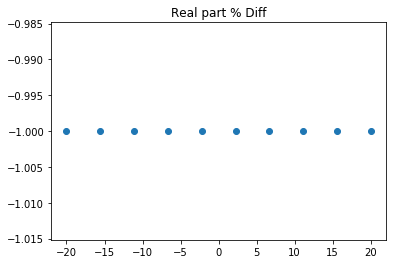

In [17]:
plt.scatter(np.linspace(-20, 20, 10), (np.real(G_values) - np.real(G__values))/(np.real(G__values)))
plt.title("Real part % Diff")
plt.show()

In [40]:
print (np.real(G_values), np.real(G__values))

[-1.05712319e-03  1.32702860e-03  3.45891269e-04 -1.00022056e-03
  2.87490741e-04  1.44915020e-03 -1.03139923e-03  6.32122919e-05
 -3.91591683e-03 -1.18816574e-03] [-1.05712319e-03  1.32702860e-03  3.45891269e-04 -1.00022056e-03
  2.87490741e-04  1.44915020e-03 -1.03139923e-03  6.32122919e-05
 -3.91591683e-03 -1.18816574e-03]


In [41]:
print (np.imag(G_values), np.imag(G__values))

[ 1.35110830e-05 -3.54378525e-04  5.57359669e-05  1.46239613e-06
 -5.03702854e-05  3.64165246e-04 -9.88679773e-06 -1.50625462e-05
  1.26488171e-03 -3.37833992e-05] [ 1.35110830e-05 -3.54378525e-04  5.57359669e-05  1.46239613e-06
 -5.03702854e-05  3.64165246e-04 -9.88679773e-06 -1.50625462e-05
  1.26488171e-03 -3.37833992e-05]
